**What is the correlation of Padres payroll and winning percentage?**

A study looking at whether increases in Padres spending towards player contracts correlates with team success.

## Import tables of interest

In [10]:
import pandas as pd

In [11]:
# Import HTML table of winning percentage
url = 'https://en.wikipedia.org/wiki/List_of_San_Diego_Padres_seasons'
data = pd.read_html(url, header=0)
df_winPerc = data[1].head(49) # remove the footers too

In [12]:
# Import table for salary
url = 'http://www.baseballprospectus.com/compensation/?cyear=2017&team=SDN&pos='
data = pd.read_html(url, header=0)
df = data[1].iloc[36:,:]
df.columns = df.iloc[0]
# Some cleaning
df_Payroll = df.drop(36, axis=0).drop(['PR Sort', 'Diff', 'AvgPR Sort', 'Diff Sort'], axis=1).iloc[:, :3]

In [13]:
# Merge both dataframes into a single dataframe
df_all = pd.merge(df_winPerc, df_Payroll, how='inner', left_on='Season', right_on='Year')

In [14]:
# Convert currencies to float
df_all['Padres payroll'] = df_all['Padres payroll'].str.replace('$', '').str.replace(',','').astype(float)
df_all['Avg payroll'] = df_all['Avg payroll'].str.replace('$', '').str.replace(',','').astype(float)

# Make a column showing payroll relative to league average
df_all['Padres Payroll % of MLB average'] = df_all['Padres payroll']/df_all['Avg payroll']

# Start at 2000s to since no data is available for 1998, 1999
df_all = df_all.iloc[2:,:]

# Convert season to datetime format
df_all['Season'] = pd.to_datetime(df_all['Season'])

In [15]:
# Set the index to the season
df_all.set_index('Season', inplace=True)

In [17]:
df_all.head()

,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards,Year,Padres payroll,Avg payroll,Padres Payroll % of MLB average
Season,,,,,,,,,,,,,,
2000-01-01,MLB,NL,West,5th,76.0,86.0,0.469,21,NaN,NaN,2000,53816000.0,57491092.0,0.936075
2001-01-01,MLB,NL,West,4th,79.0,83.0,0.488,13,NaN,NaN,2001,37438000.0,67120750.0,0.557771
2002-01-01,MLB,NL,West,5th,66.0,96.0,0.407,32,NaN,NaN,2002,40678000.0,69204705.0,0.587792
2003-01-01,MLB,NL,West,5th,64.0,98.0,0.395,36½,NaN,NaN,2003,43565000.0,72156639.0,0.603756
2004-01-01,MLB,NL,West,3rd,87.0,75.0,0.537,6,NaN,NaN,2004,59172333.0,71426357.0,0.828438


## Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

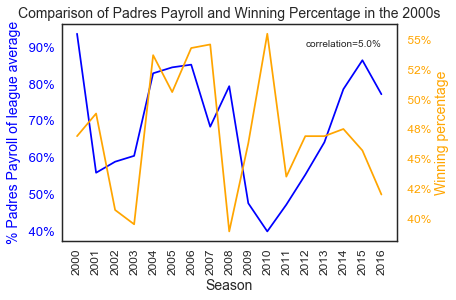

In [19]:
# Use the 'seaborn-colorblind' style
sns.set_style('white')
plt.style.use('seaborn-colorblind')

fig, ax = plt.subplots()
ax.plot(df_all['Padres Payroll % of MLB average'], color='blue')
ax2 =ax.twinx()
ax2.plot(df_all['Win%'], color='orange')

# Change left y-axis to percentage and make blue
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='blue', size=13);
ax.set_ylabel('% Padres Payroll of league average', size=14)
ax.yaxis.label.set_color('blue')

# Change right y-axis to percentage and make orange
vals = ax2.get_yticks();
ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='orange', size=12);
ax2.set_ylabel('Winning percentage', size=14)
ax2.yaxis.label.set_color('orange')

# Edit title and xlabel
ax.set_xlabel('Season', size=14)
ax.set_title('Comparison of Padres Payroll and Winning Percentage in the 2000s', size=14)

# Change years to show all and rotate
ax.set_xticks(df_all.index);
ax.set_xticklabels(df_all.index.year, size=12, rotation=90);

# Add correlation coefficient
cc = df_all[['Win%', 'Padres Payroll % of MLB average']].corr(method='pearson', min_periods=1).iloc[0,1];
ax.text(ax.get_xticks()[-1], ax.get_yticks()[-2], 'correlation='+str("%.1f" % (100*cc))+'%', ha='right');

# save figure
#plt.savefig('pctPadresPayroll_pctWinning.png', dpi=400)